# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
ts = pd.read_csv('zillow_data.csv')
ts.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [2]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [3]:

#out of top 50 sizerank:
    #find top 5 ROI ((value today / value original) - 1 zip codes
    #forecast 10 year investment horizon for each zipcode
    #refine model
    #forecast again
    #choose best zipcode to invest


In [4]:
top_50_size = ts.iloc[:50]
top_50_size

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [5]:
top_50_size['ROI'] = (top_50_size['2018-04'] / top_50_size['1996-04']) - 1
top_50_size.head()

<ipython-input-5-2b1340729555>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_size['ROI'] = (top_50_size['2018-04'] / top_50_size['1996-04']) - 1


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.365295
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.567966
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,0.571798


In [6]:
top_50_size['ROI'].nlargest(n=10)

29    6.330859
33    5.030201
10    4.945679
30    4.774809
47    4.195133
9     3.978460
46    3.323709
12    3.297147
13    3.284514
15    3.040656
Name: ROI, dtype: float64

In [7]:
top5 = top_50_size.iloc[[29, 33, 10, 30, 47]]
top5

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,668000,672200,673100,674600,678200,680900,683000,687500,691300,6.330859
33,66133,20009,Washington,DC,Washington,District of Columbia,34,178800.0,179200.0,179600.0,...,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200,5.030201
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,4.945679
30,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,...,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900,4.774809
47,62040,11230,New York,NY,New York,Kings,48,230100.0,230800.0,231500.0,...,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400,4.195133


# Step 3: EDA and Visualization

In [8]:
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [9]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [10]:
melted_ts = melt_data(top5)

<AxesSubplot:xlabel='time'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


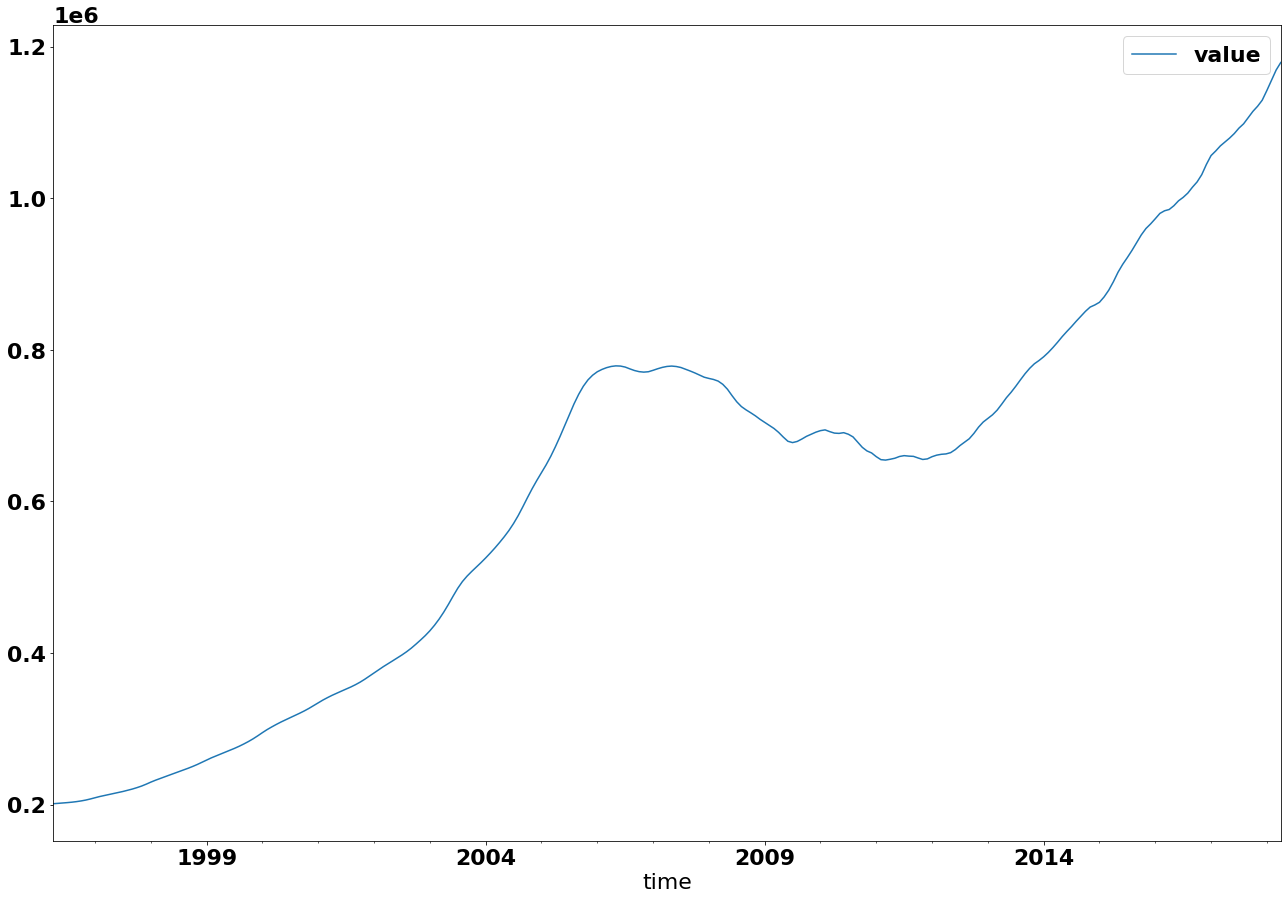

In [11]:
melted_ts.plot(figsize=(22,15))

positive trend, with cyclical movement corresponding to the business cycle of recession (i.e. post 2008 lows) and growth.

In [12]:
region1 = top5.iloc[[0]]
region2 = top5.iloc[[1]]
region3 = top5.iloc[[2]]
region4 = top5.iloc[[3]]
region5 = top5.iloc[[4]]

<AxesSubplot:xlabel='time'>

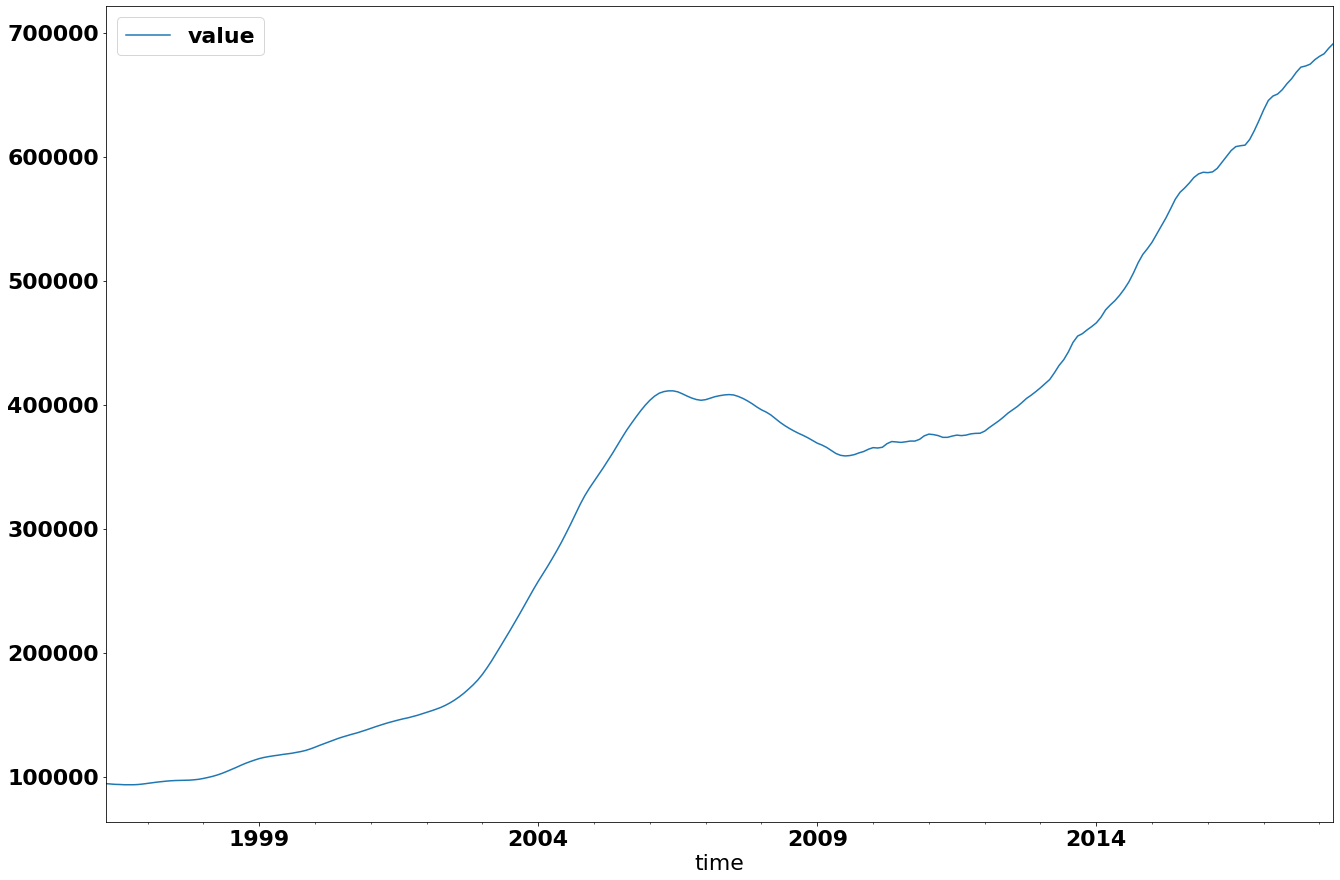

In [13]:
melted_r1 = melt_data(region1)
melted_r1.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

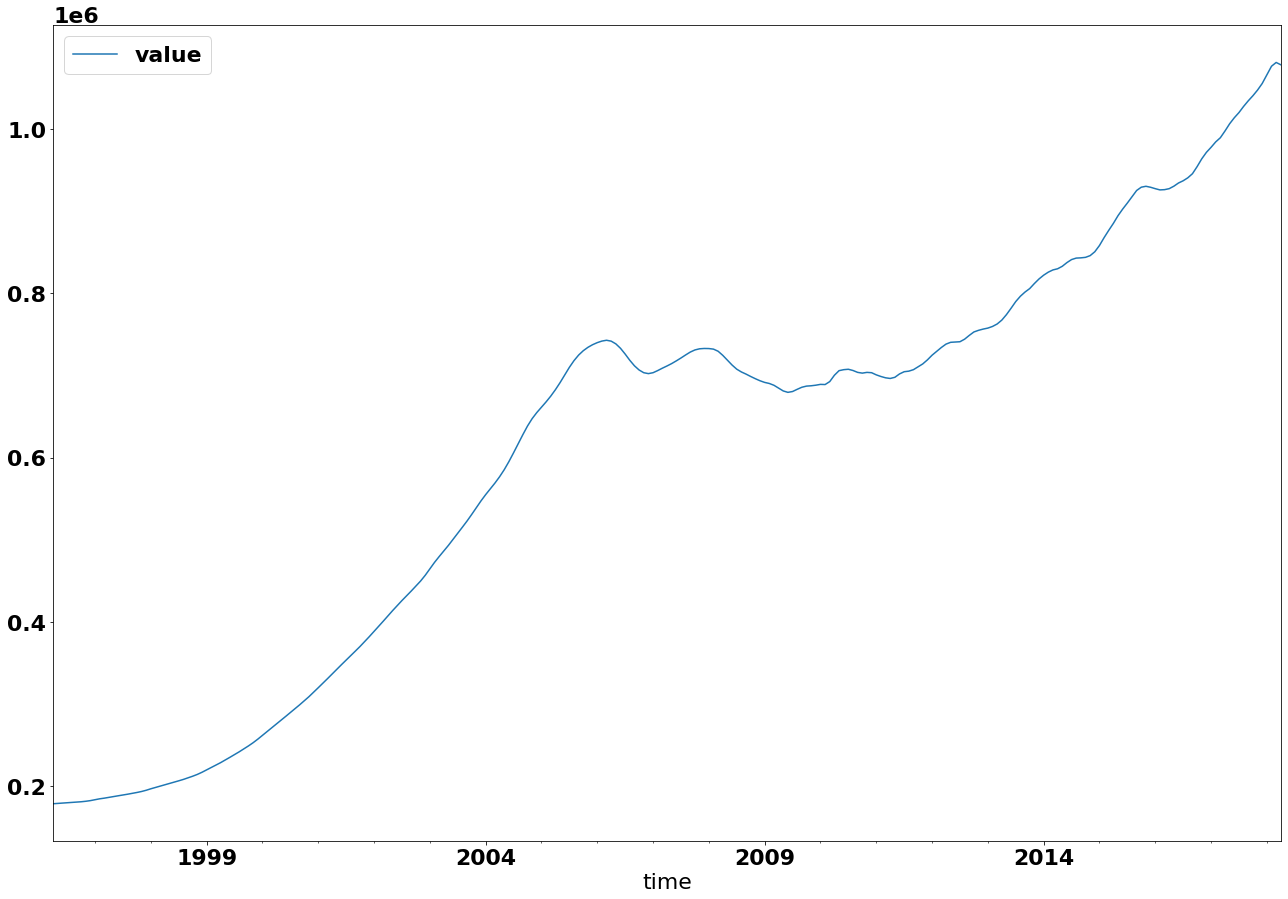

In [14]:
melted_r2 = melt_data(region2)
melted_r2.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

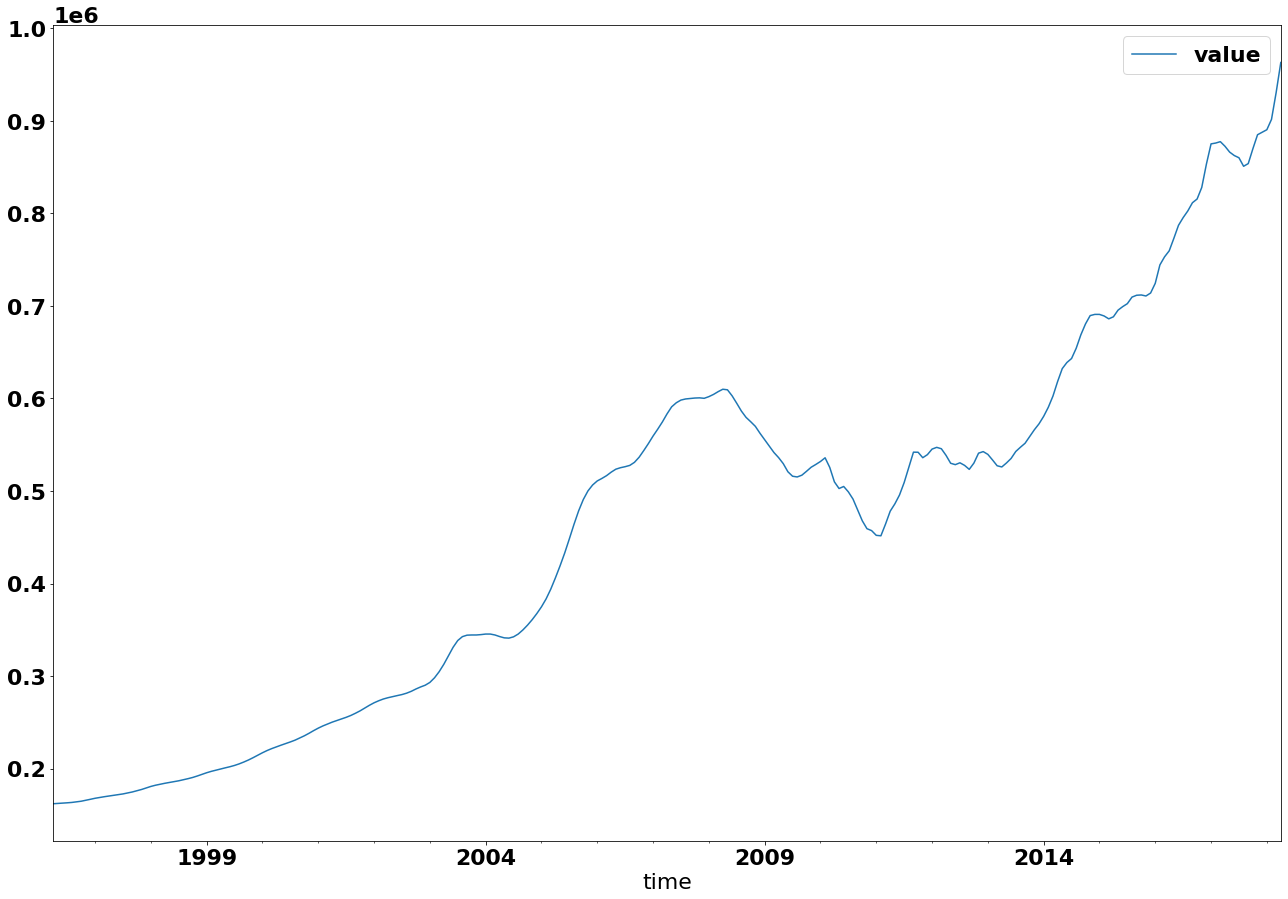

In [15]:
melted_r3 = melt_data(region3)
melted_r3.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

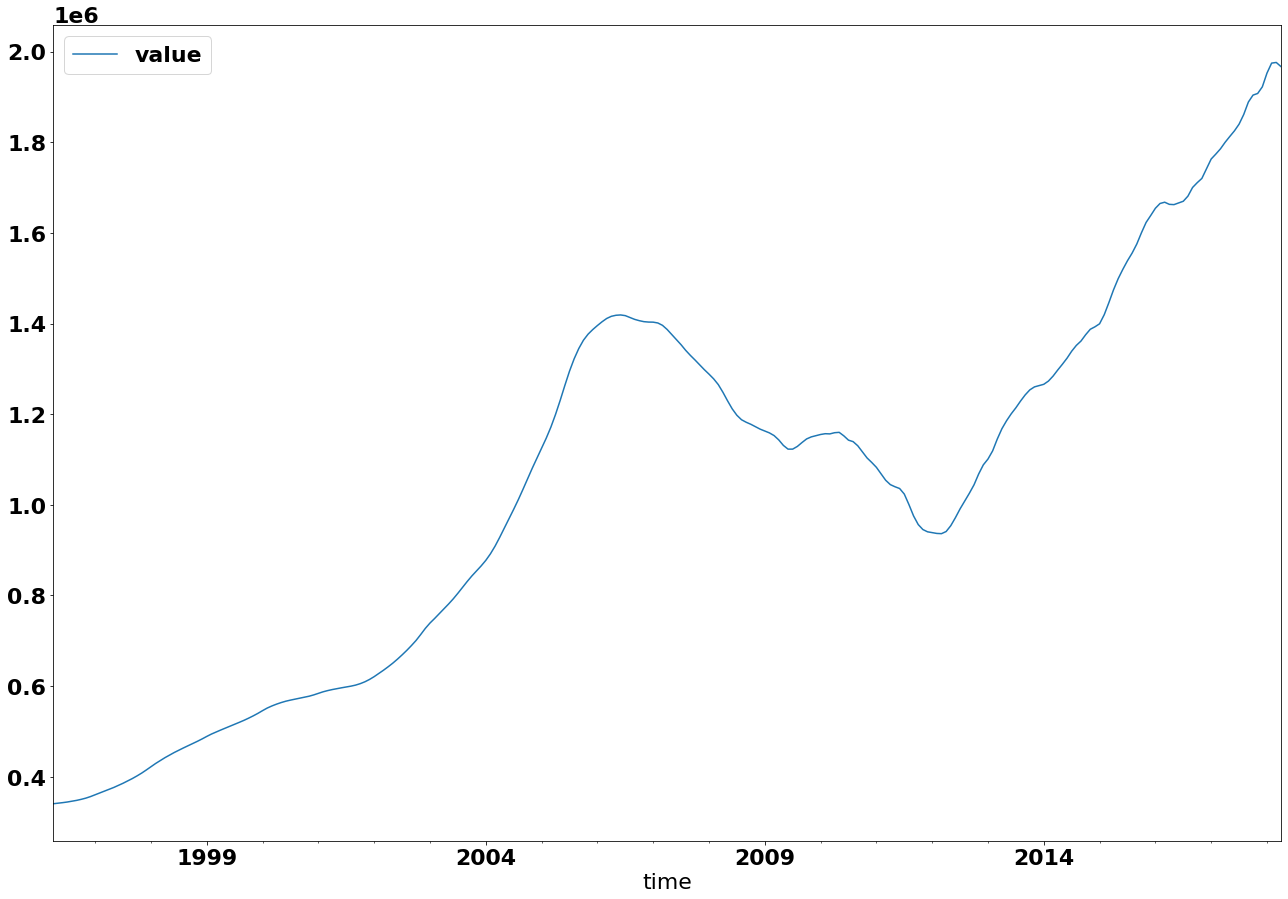

In [16]:
melted_r4 = melt_data(region4)
melted_r4.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

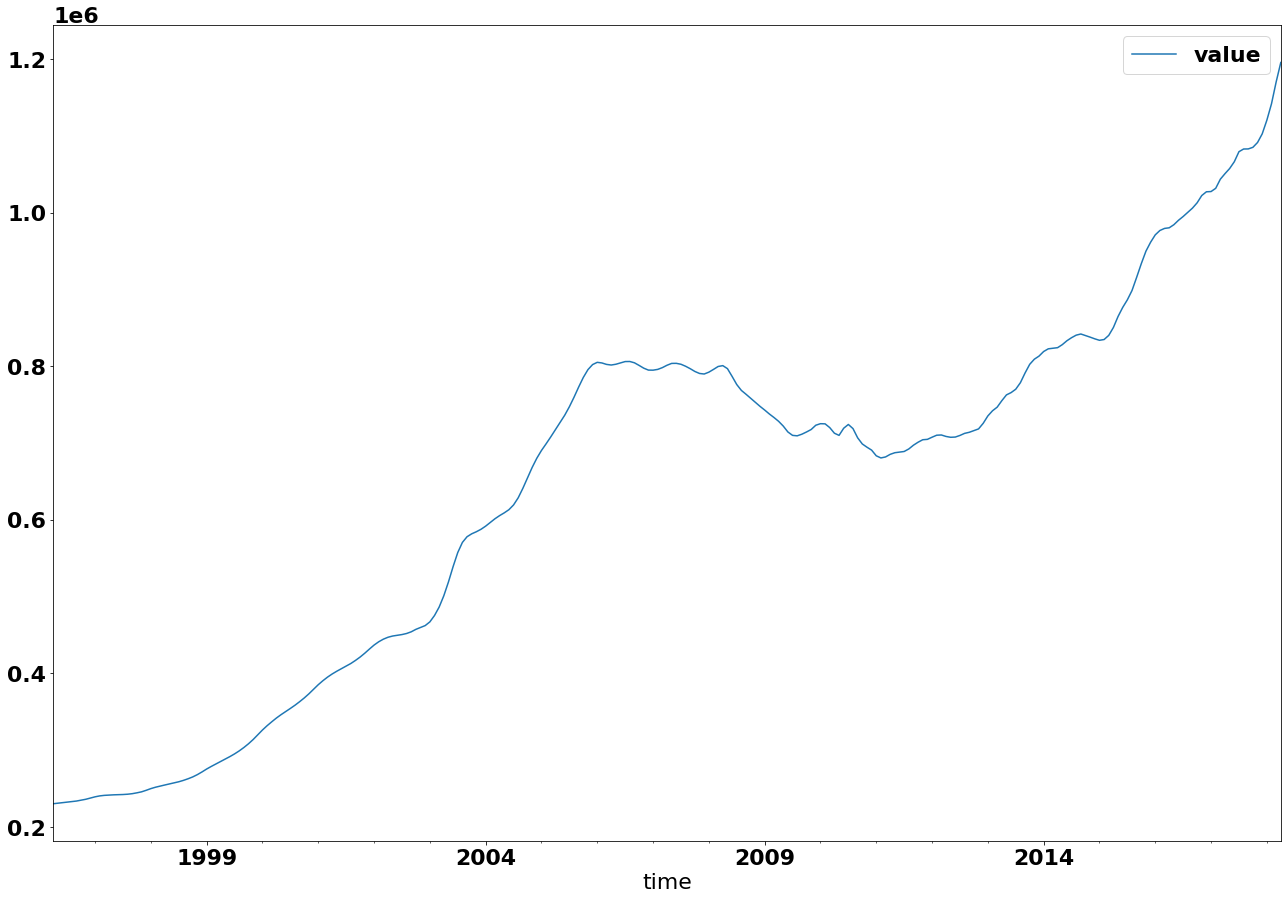

In [17]:
melted_r5 = melt_data(region5)
melted_r5.plot(figsize=(22,15))

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


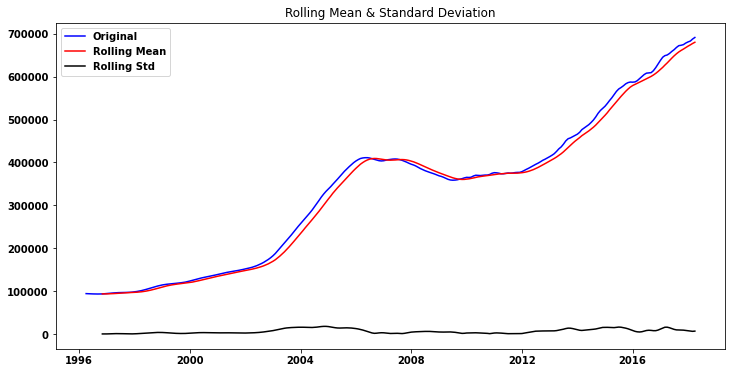

Results of Dickey-Fuller Test: 

Test Statistic                  -0.546137
p-value                          0.882694
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [19]:
stationarity_check(melted_r1)

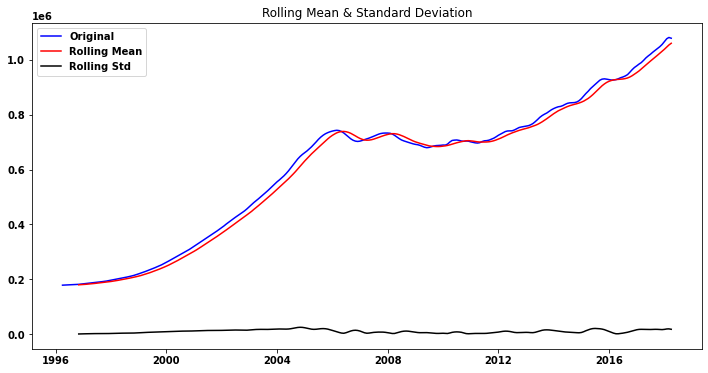

Results of Dickey-Fuller Test: 

Test Statistic                  -1.118915
p-value                          0.707470
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [20]:
stationarity_check(melted_r2)

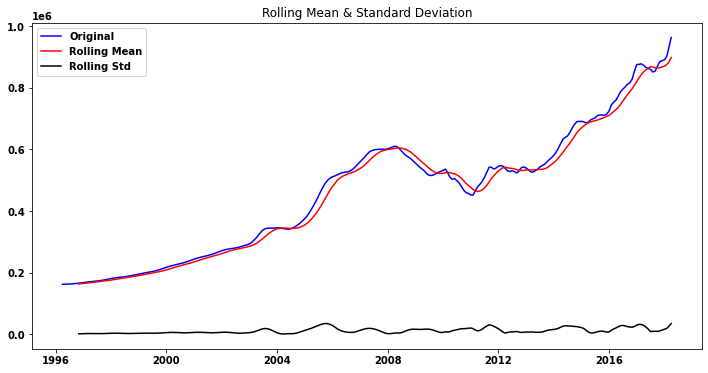

Results of Dickey-Fuller Test: 

Test Statistic                   0.625410
p-value                          0.988225
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [21]:
stationarity_check(melted_r3)

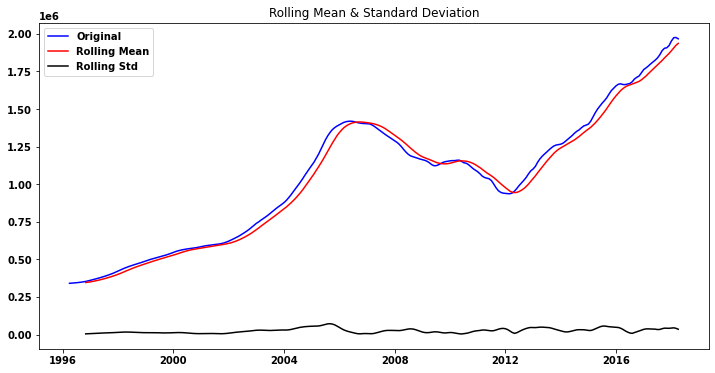

Results of Dickey-Fuller Test: 

Test Statistic                  -0.975326
p-value                          0.762157
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [22]:
stationarity_check(melted_r4)

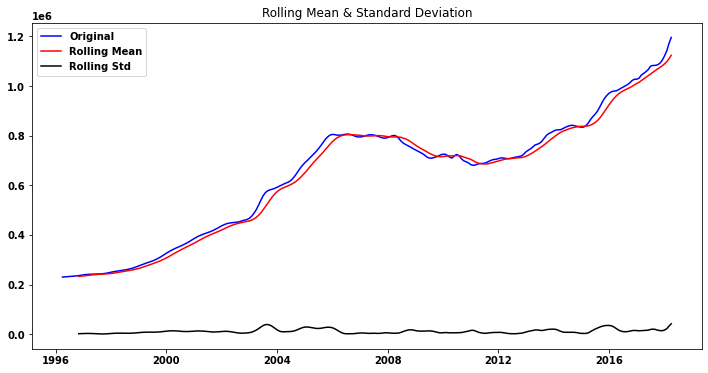

Results of Dickey-Fuller Test: 

Test Statistic                   0.223604
p-value                          0.973555
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [23]:
stationarity_check(melted_r5)

Each series fails to reject Dickey-Fuller test. All non-stationary. Requires time series decomposition.

In [24]:
#forecast across top5 zipcodes for 10 years. ARIMA modelling will allow us to address
#stationarity problem

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
decomposition_r1 = seasonal_decompose(melted_r1)

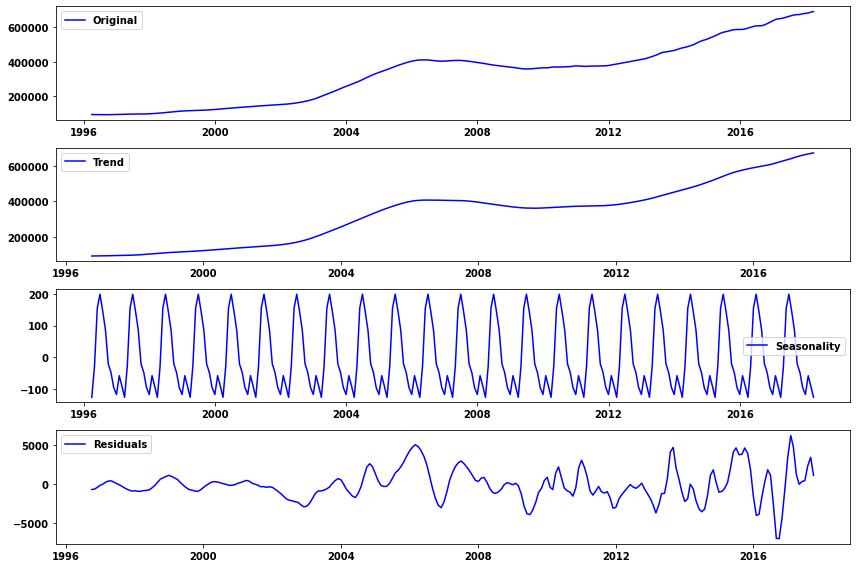

In [27]:
trend_r1 = decomposition_r1.trend
seasonal_r1 = decomposition_r1.seasonal
residual_r1 = decomposition_r1.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r1, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r1, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r1,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r1, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

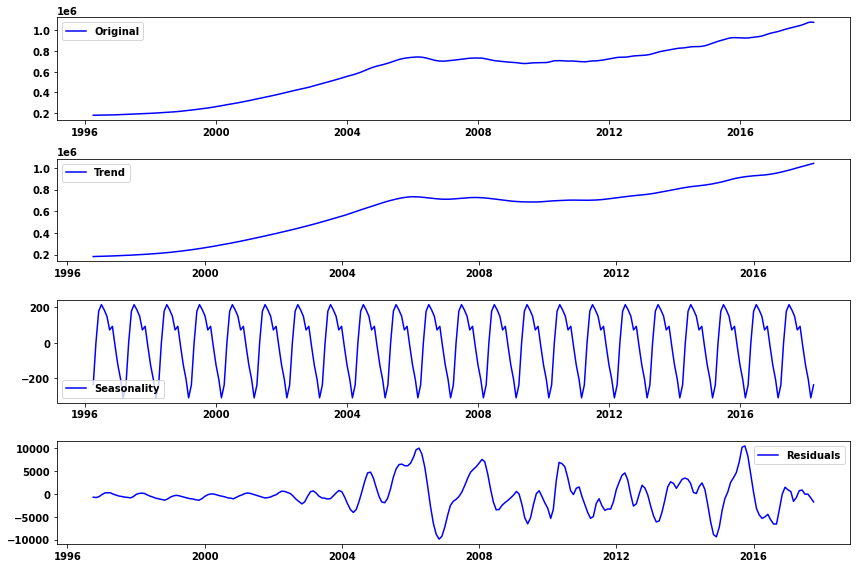

In [28]:
decomposition_r2 = seasonal_decompose(melted_r2)

trend_r2 = decomposition_r2.trend
seasonal_r2 = decomposition_r2.seasonal
residual_r2 = decomposition_r2.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r2, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r2, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r2,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r2, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

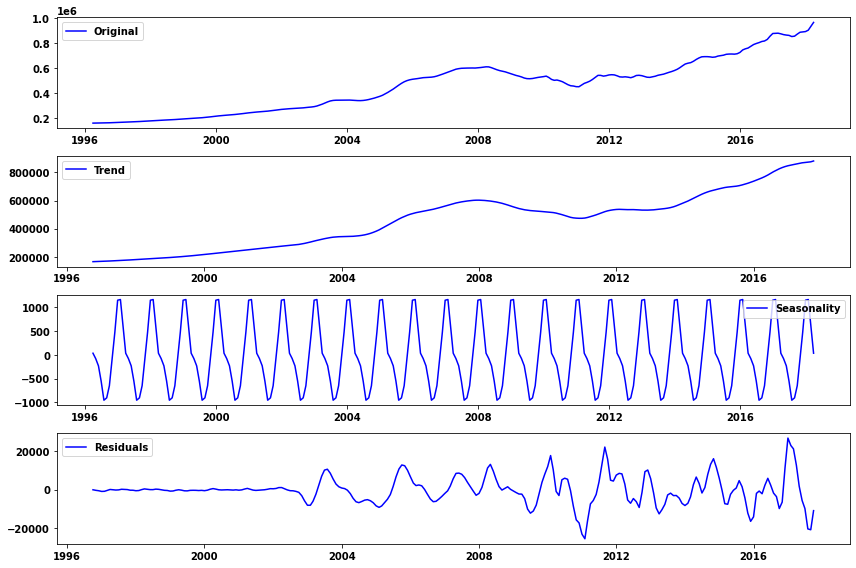

In [29]:
decomposition_r3 = seasonal_decompose(melted_r3)

trend_r3 = decomposition_r3.trend
seasonal_r3 = decomposition_r3.seasonal
residual_r3 = decomposition_r3.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r3, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r3, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r3,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r3, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

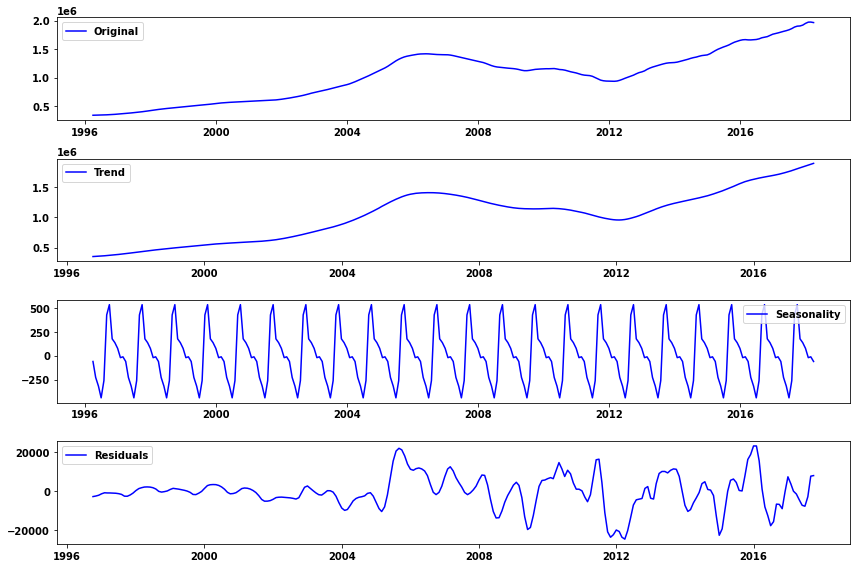

In [30]:
decomposition_r4 = seasonal_decompose(melted_r4)

trend_r4 = decomposition_r4.trend
seasonal_r4 = decomposition_r4.seasonal
residual_r4 = decomposition_r4.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r4, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r4, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r4,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r4, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

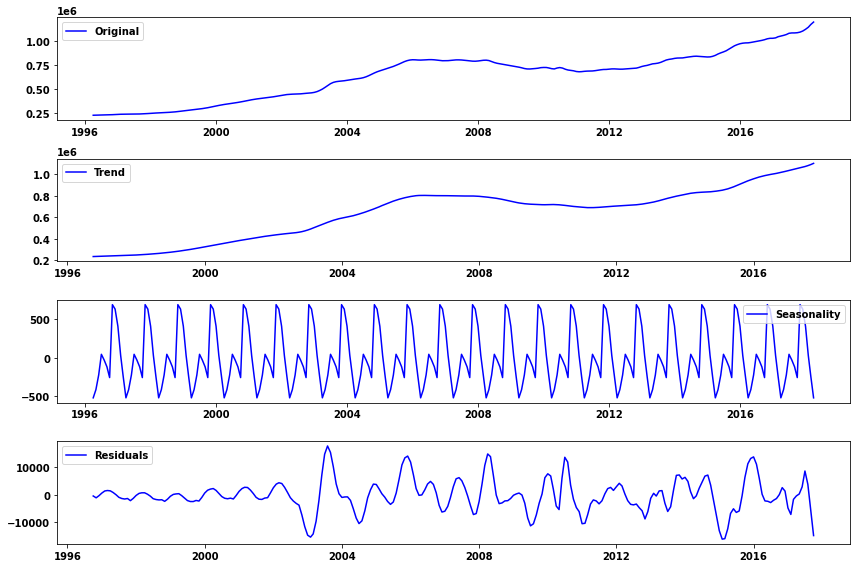

In [31]:
decomposition_r5 = seasonal_decompose(melted_r5)

trend_r5 = decomposition_r5.trend
seasonal_r5 = decomposition_r5.seasonal
residual_r5 = decomposition_r5.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r5, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r5, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r5,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r5, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [32]:
#r1 detrending
r1_diff = melted_r1.diff(periods=12).dropna()
r1_diff.head()

,value
time,
1997-04-01,1600.0
1997-05-01,2300.0
1997-06-01,2900.0
1997-07-01,3200.0
1997-08-01,3500.0


<AxesSubplot:xlabel='time'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


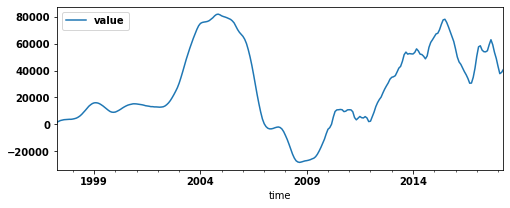

In [33]:
r1_diff.plot(figsize=(8,3))

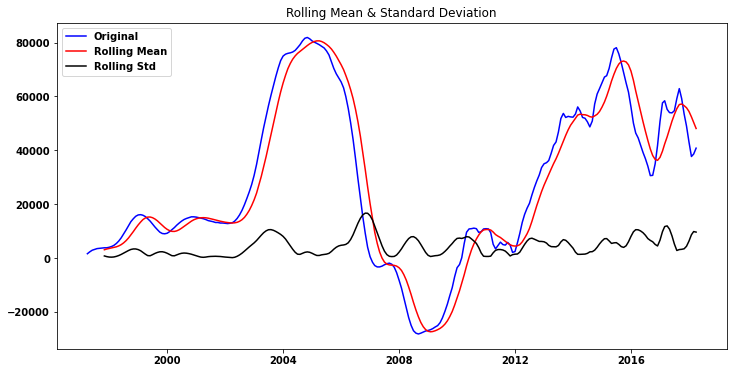

Results of Dickey-Fuller Test: 

Test Statistic                  -2.682160
p-value                          0.077177
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [34]:
stationarity_check(r1_diff)

In [35]:
r1_rollmean = melted_r1.rolling(window=12).mean()
r1_minusroll = melted_r1 - r1_rollmean
r1_minusroll.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,NaN
1996-07-01,NaN
1996-08-01,NaN
1996-09-01,NaN
1996-10-01,NaN
1996-11-01,NaN
1996-12-01,NaN


<AxesSubplot:xlabel='time'>

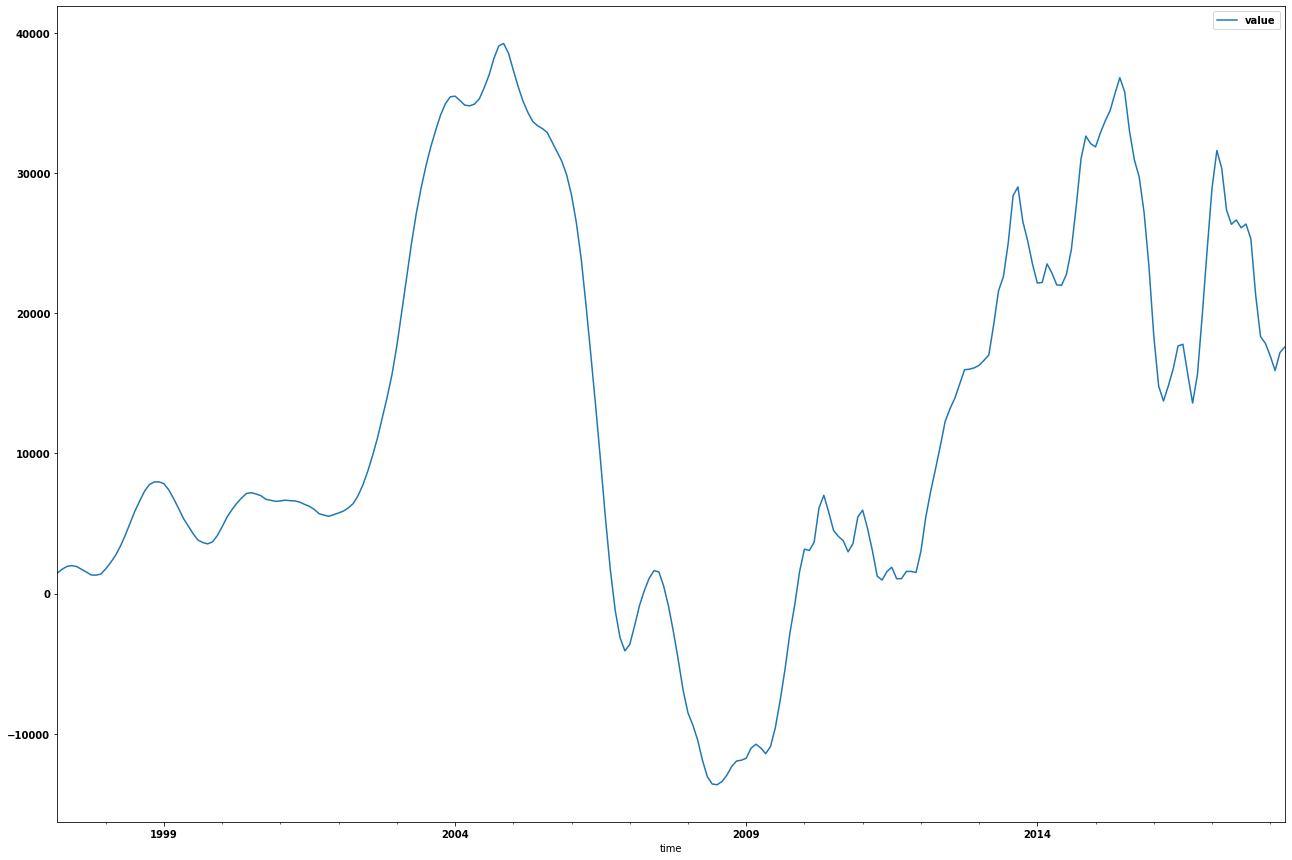

In [36]:
r1_minusroll.dropna(inplace=True)
r1_minusroll.plot(figsize=(22,15))

In [37]:
r1_roll_diff = r1_minusroll.diff(periods=1)
r1_roll_diff.dropna(inplace=True)
r1_roll_diff.head()

,value
time,
1997-04-01,266.666667
1997-05-01,208.333333
1997-06-01,58.333333
1997-07-01,-66.666667
1997-08-01,-191.666667


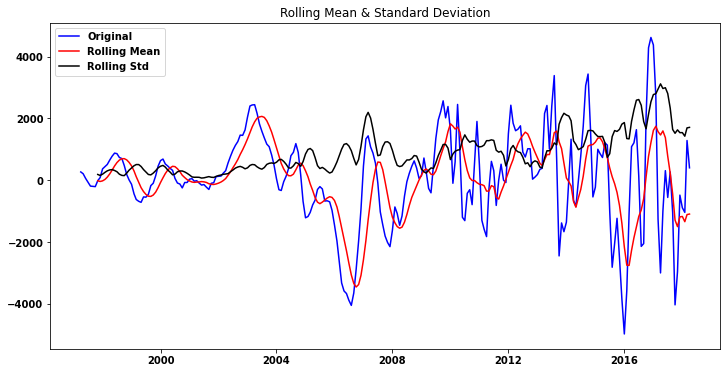

Results of Dickey-Fuller Test: 

Test Statistic                  -2.441433
p-value                          0.130382
#Lags Used                      16.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [38]:
stationarity_check(r1_roll_diff)

NameError: name 'r1_' is not defined

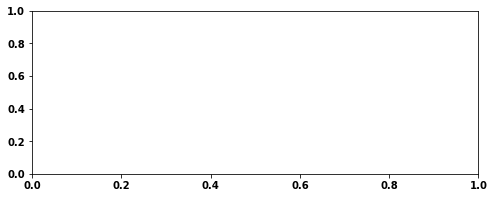

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8,3))
plot_acf(r1_.dropna(), ax=ax, lags=12);

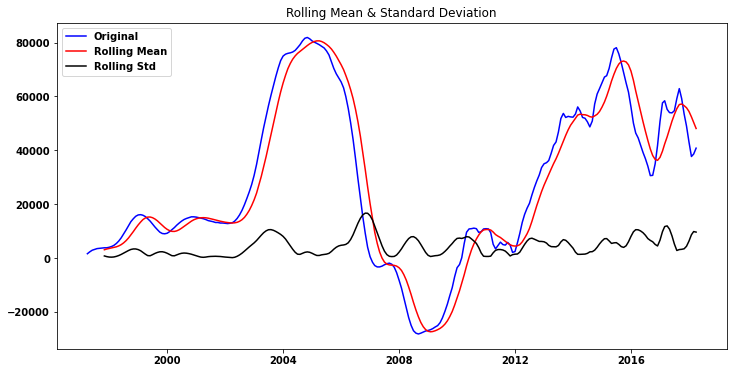

Results of Dickey-Fuller Test: 

Test Statistic                  -2.682160
p-value                          0.077177
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [40]:
stationarity_check(r1_diff)

In [41]:
#r2 preprocessing

r2_roll = melted_r2.rolling(window=12).mean()
r2_minusroll = melted_r2 - r2_roll
r2_minusroll.dropna(inplace=True)



In [42]:
r2_roll_diff = r2_minusroll.diff(periods=1)
r2_roll_diff.dropna(inplace=True)
r2_roll_diff.head()


,value
time,
1997-04-01,350.000000
1997-05-01,208.333333
1997-06-01,258.333333
1997-07-01,116.666667
1997-08-01,158.333333


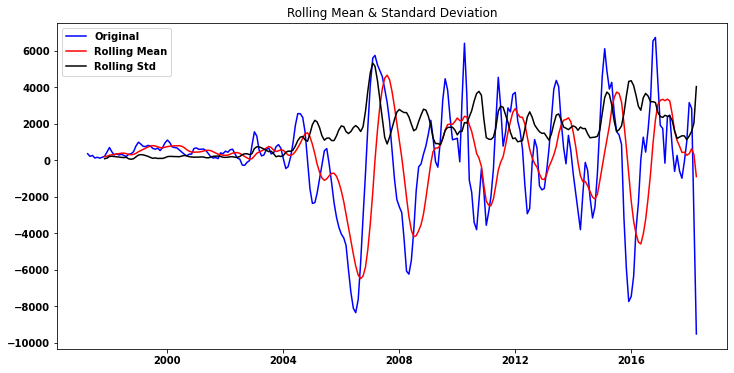

Results of Dickey-Fuller Test: 

Test Statistic                  -4.703672
p-value                          0.000083
#Lags Used                      13.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [43]:
stationarity_check(r2_roll_diff)

In [44]:
#r3 de-trending
r3_roll = melted_r3.rolling(window=12).mean()
r3_minusroll = melted_r3 - r3_roll
r3_minusroll.dropna(inplace=True)


In [45]:
r3_roll_diff = r3_minusroll.diff(periods=1)
r3_roll_diff.dropna(inplace=True)
r3_roll_diff.head()


,value
time,
1997-04-01,100.000000
1997-05-01,-33.333333
1997-06-01,-66.666667
1997-07-01,0.000000
1997-08-01,150.000000


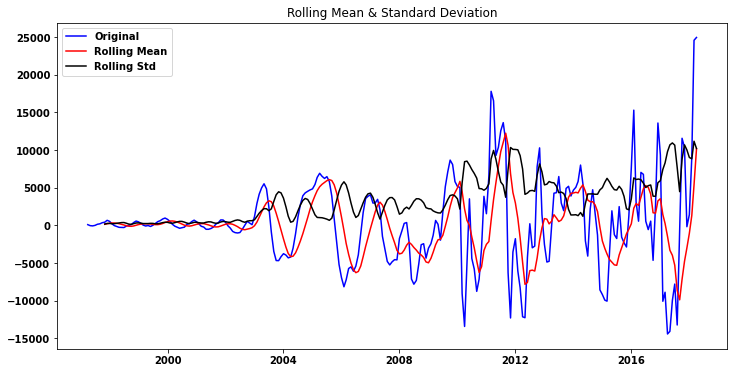

Results of Dickey-Fuller Test: 

Test Statistic                  -5.073185
p-value                          0.000016
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [46]:
stationarity_check(r3_roll_diff)

In [47]:
#r4 de-trend
r4_roll = melted_r4.rolling(window=12).mean()
r4_minusroll = melted_r4 - r4_roll
r4_minusroll.dropna(inplace=True)

In [48]:
r4_roll_diff = r4_minusroll.diff(periods=1)
r4_roll_diff.dropna(inplace=True)
r4_roll_diff.head()


,value
time,
1997-04-01,1458.333333
1997-05-01,1300.000000
1997-06-01,1425.000000
1997-07-01,1250.000000
1997-08-01,1366.666667


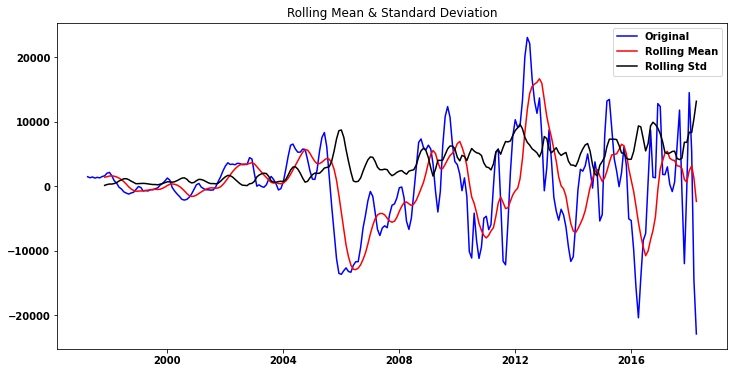

Results of Dickey-Fuller Test: 

Test Statistic                  -4.541595
p-value                          0.000165
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [49]:
stationarity_check(r4_roll_diff)

In [50]:
#r5 de-trend
r5_roll = melted_r5.rolling(window=12).mean()
r5_minusroll = melted_r5 - r5_roll
r5_minusroll.dropna(inplace=True)

In [51]:
r5_roll_diff = r5_minusroll.diff(periods=1)
r5_roll_diff.dropna(inplace=True)
r5_roll_diff.head()


,value
time,
1997-04-01,-541.666667
1997-05-01,-608.333333
1997-06-01,-666.666667
1997-07-01,-633.333333
1997-08-01,-408.333333


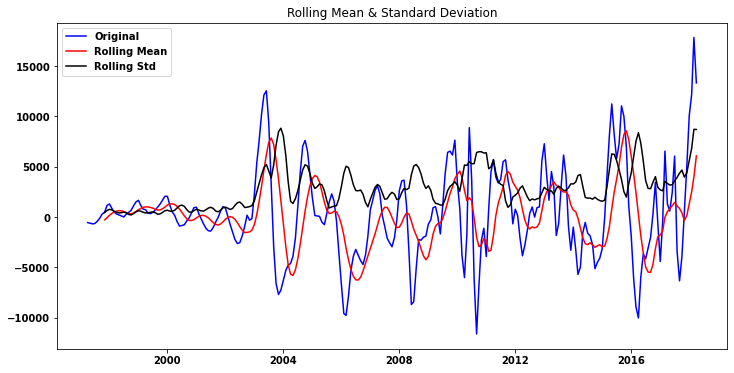

Results of Dickey-Fuller Test: 

Test Statistic                -6.215821e+00
p-value                        5.369198e-08
#Lags Used                     8.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


In [52]:
stationarity_check(r5_roll_diff)

# Step 5: ARIMA Modeling

In [53]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

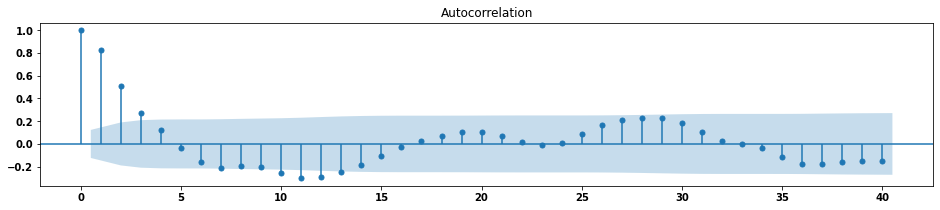

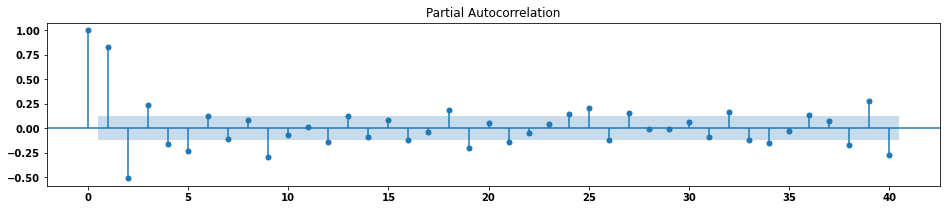

In [54]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(r5_roll_diff, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(r5_roll_diff, ax=ax, lags=40);

Both ACF and PACF tail off, indicating an ARMA model with both AR and MA parameters is best:

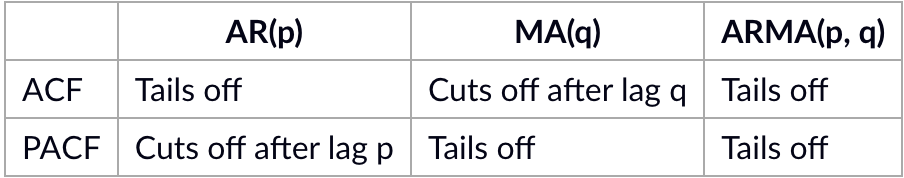

In [ ]:
r5_arma = ARMA(r5_roll_diff, order=)
r5_arma.fit()

In [55]:
from pmdarima.arima import auto_arima

In [57]:
r5_autoarima = auto_arima(r5_roll_diff, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4968.957, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4665.478, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4731.919, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4968.356, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4668.811, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=4660.478, Time=0.80 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=4647.458, Time=1.58 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=4935.688, Time=0.81 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=4582.708, Time=1.70 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=4598.579, Time=0.64 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(3,0,0)(3,0,0)[12] intercept   : AIC=4576.678, Time=1.94 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=4589.812, Time=0.83 sec
 ARIMA(3,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=4.66 sec
 ARIMA(3,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.88 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(3,0,0)[12] intercept   : AIC=4578.598, Time=1.84 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(3,0,0)[12] intercept   : AIC=4578.186, Time=0.95 sec
 ARIMA(3,0,0)(3,0,0)[12]             : AIC=4575.140, Time=0.47 sec
 ARIMA(3,0,0)(2,0,0)[12]             : AIC=4588.198, Time=0.19 sec
 ARIMA(3,0,0)(3,0,1)[12]             : AIC=inf, Time=2.95 sec
 ARIMA(3,0,0)(2,0,1)[12]             : AIC=inf, Time=2.79 sec
 ARIMA(2,0,0)(3,0,0)[12]             : AIC=4581.268, Time=0.33 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(3,0,0)[12]             : AIC=4577.054, Time=1.02 sec
 ARIMA(2,0,1)(3,0,0)[12]             : AIC=4576.645, Time=0.44 sec

Best model:  ARIMA(3,0,0)(3,0,0)[12]          
Total fit time: 35.187 seconds


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [58]:
r5_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  253
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 12)   Log Likelihood               -2280.570
Date:                            Mon, 01 Aug 2022   AIC                           4575.140
Time:                                    11:01:13   BIC                           4599.874
Sample:                                         0   HQIC                          4585.091
                                            - 253                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3534      0.042     32.602      0.000       1.272       1.435
ar.L2         -0.7432      0.075     -9.889      0.000      -0.890      -0.596
ar.L3          0.1847      0.056      3.325      0.001       0.076       0.294
ar.S.L12      -0.1001      0.064     -1.575      0.115      -0.225       0.024
ar.S.L24      -0.1287      0.072     -1.796      0.072      -0.269       0.012
ar.S.L36      -0.2906      0.099     -2.927      0.003      -0.485      -0.096
sigma2      4.252e+06   2.73e+05     15.572      0.000    3.72e+06    4.79e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               261.58
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               8.45   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
r1_autoarima = auto_arima(r1_roll_diff, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4420.490, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4143.948, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4177.101, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4418.950, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4151.012, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=4131.270, Time=1.22 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=4120.337, Time=3.28 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=4403.640, Time=0.96 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=4078.826, Time=2.73 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=4084.004, Time=1.60 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(3,0,0)(3,0,0)[12] intercept   : AIC=4041.167, Time=3.55 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=4047.990, Time=1.99 sec
 ARIMA(3,0,0)(3,0,1)[12] intercept   : AIC=4026.626, Time=4.18 sec
 ARIMA(3,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(3,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=4.86 sec
 ARIMA(3,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(3,0,1)(3,0,1)[12] inter

In [60]:
r1_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  253
Model:             SARIMAX(3, 0, 0)x(3, 0, [1], 12)   Log Likelihood               -2004.313
Date:                              Mon, 01 Aug 2022   AIC                           4026.626
Time:                                      11:03:39   BIC                           4058.427
Sample:                                           0   HQIC                          4039.420
                                              - 253                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.4081      8.873     -0.609      0.542     -22.799      11.983
ar.L1          1.3307      0.056     23.969      0.000       1.222       1.440
ar.L2         -0.8335      0.079    -10.590      0.000      -0.988      -0.679
ar.L3          0.3739      0.052      7.171      0.000       0.272       0.476
ar.S.L12       0.3303      0.107      3.097      0.002       0.121       0.539
ar.S.L24      -0.0767      0.089     -0.861      0.389      -0.251       0.098
ar.S.L36      -0.0697      0.093     -0.750      0.453      -0.252       0.112
ma.S.L12      -0.8584      0.117     -7.362      0.000      -1.087      -0.630
sigma2      4.857e+05   4.24e+04     11.458      0.000    4.03e+05    5.69e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.20   Jarque-Bera (JB):                30.66
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):              22.98   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
r2_autoarima = auto_arima(r2_roll_diff, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4722.081, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4326.749, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4399.782, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4720.519, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4350.915, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=4310.646, Time=1.96 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=4312.318, Time=3.45 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=4657.168, Time=0.69 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=4213.817, Time=1.28 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=4214.219, Time=0.42 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=4215.800, Time=2.72 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=4199.519, Time=1.47 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=4199.560, Time=0.63 sec
 ARIMA(3,0,0)(3,0,0)[12] intercept   : AIC=4201.326, Time=2.92 sec
 ARIMA(3,0,0)(2,0,1)[12] 

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(2,0,0)[12] intercept   : AIC=4196.744, Time=1.28 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(1,0,0)[12] intercept   : AIC=4197.148, Time=0.68 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(3,0,0)[12] intercept   : AIC=4198.070, Time=2.65 sec
 ARIMA(3,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(3,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(3,0,1)(3,0,1)[12] intercept   : AIC=inf, Time=4.79 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=4195.221, Time=0.88 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=4195.628, Time=0.50 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(3,0,0)[12] intercept   : AIC=4196.557, Time=2.08 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,0,1)(3,0,1)[12] intercept   : AIC=inf, Time=3.52 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=4210.270, Time=0.70 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=4162.776, Time=1.50 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=4163.088, Time=0.61 sec
 ARIMA(2,0,2)(3,0,0)[12] intercept   : AIC=4164.724, Time=3.15 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=4171.516, Time=0.87 sec
 ARIMA(2,0,2)(3,0,1)[12] intercept   : AIC=inf, Time=3.95 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=4185.483, Time=0.98 sec
 ARIMA(3,0,2)(2,0,0)[12] intercept   : AIC=4199.951, Time=2.07 sec
 ARIMA(2,0,3)(2,0,0)[12] intercept   : AIC=4164.310, Time=1.59 sec
 ARIMA(1,0,3)(2,0,0)[12] intercept   : AIC=4176.863, Time=0.95 sec
 ARIMA(3,0,3)(2,0,0)[12] intercept   : AIC=4168.166, Time=2.31 sec
 ARIMA(2,0,2)(2,0,0)[12]             : AIC=4160.771, Time=1.09 sec
 ARIMA(2,0,2)(1,0,0)[12]             : AIC=4161.083, Time=0.42 sec
 ARIMA(2,0,2)(3,0,0)[12]             : AIC=4162.719, Time=2.38 sec
 ARIM

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(2,0,0)[12]             : AIC=4193.212, Time=0.41 sec
 ARIMA(3,0,2)(2,0,0)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(2,0,3)(2,0,0)[12]             : AIC=4162.313, Time=1.36 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(2,0,0)[12]             : AIC=4208.262, Time=0.42 sec
 ARIMA(1,0,3)(2,0,0)[12]             : AIC=4174.822, Time=0.66 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(2,0,0)[12]             : AIC=4194.735, Time=1.07 sec
 ARIMA(3,0,3)(2,0,0)[12]             : AIC=inf, Time=2.34 sec

Best model:  ARIMA(2,0,2)(2,0,0)[12]          
Total fit time: 93.482 seconds


In [62]:
r2_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  253
Model:             SARIMAX(2, 0, 2)x(2, 0, [], 12)   Log Likelihood               -2073.385
Date:                             Mon, 01 Aug 2022   AIC                           4160.771
Time:                                     11:05:59   BIC                           4185.504
Sample:                                          0   HQIC                          4170.722
                                             - 253                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0664      0.060      1.108      0.268      -0.051       0.184
ar.L2          0.5000      0.065      7.686      0.000       0.373       0.628
ma.L1          1.6459      0.034     48.984      0.000       1.580       1.712
ma.L2          0.8638      0.035     24.890      0.000       0.796       0.932
ar.S.L12      -0.3845      0.065     -5.916      0.000      -0.512      -0.257
ar.S.L24      -0.1142      0.068     -1.677      0.094      -0.248       0.019
sigma2      7.487e+05   4.05e+04     18.480      0.000    6.69e+05    8.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               220.22
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):              36.08   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
r3_autoarima = auto_arima(r3_roll_diff, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True,
                          suppress_warnings=True
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5103.284, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4862.100, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5101.925, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4886.904, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=4851.035, Time=0.56 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=4842.899, Time=0.97 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=5027.837, Time=1.92 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=4813.992, Time=1.12 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=4824.537, Time=0.77 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=4772.797, Time=3.09 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(2,0,0)(3,0,2)[12] intercept   : AIC=4786.994, Time=3.43 sec
 ARIMA(2,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(3,0,0)(3,0,1)[12] intercept   : AIC=4768.797, Time=4.08 sec
 ARIMA(3,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(3,0,0)(3,0,0)[12] intercept   : AIC=4795.931, Time=1.48 sec
 ARIMA(3,0,0)(3,0,2)[12] intercept   : AIC=4763.712, Time=4.91 sec
 ARIMA(3,0,0)(2,0,2)

In [64]:
r3_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  253
Model:             SARIMAX(3, 0, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -2371.856
Date:                                 Mon, 01 Aug 2022   AIC                           4763.712
Time:                                         11:07:52   BIC                           4799.046
Sample:                                              0   HQIC                          4777.928
                                                 - 253                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.2950     33.317      0.759      0.448     -40.006      90.596
ar.L1          1.1025      0.064     17.125      0.000       0.976       1.229
ar.L2         -0.5895      0.080     -7.343      0.000      -0.747      -0.432
ar.L3          0.2685      0.062      4.319      0.000       0.147       0.390
ar.S.L12       0.5259      0.646      0.814      0.416      -0.741       1.793
ar.S.L24      -0.1490      0.212     -0.702      0.482      -0.565       0.267
ar.S.L36      -0.1577      0.137     -1.153      0.249      -0.426       0.110
ma.S.L12      -1.2494      0.644     -1.941      0.052      -2.511       0.013
ma.S.L24       0.3546      0.624      0.568      0.570      -0.868       1.577
sigma2      9.353e+06      0.000   2.46e+10      0.000    9.35e+06    9.35e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):               242.53
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):              51.89   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+26. Standard errors may be unstable.
"""

In [65]:
r4_autoarima = auto_arima(r4_roll_diff, start_p=0, start_q=0, m=12, d=0,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=0, max_P=3, max_Q=3,
                          max_D=3, seasonal=True, trace=True, stepwise=True,
                          suppress_warnings=True
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5186.078, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4879.163, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4920.853, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5184.272, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4880.335, Time=0.02 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=4876.042, Time=0.47 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=4865.448, Time=1.60 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=5183.839, Time=0.62 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=4811.758, Time=1.17 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=4820.874, Time=0.55 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(3,0,0)(3,0,0)[12] intercept   : AIC=4743.436, Time=1.38 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=4749.754, Time=0.78 sec
 ARIMA(3,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=4.19 sec
 ARIMA(3,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.91 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(3,0,0)[12] intercept   : AIC=4713.484, Time=1.36 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(2,0,0)[12] intercept   : AIC=4718.319, Time=0.66 sec
 ARIMA(3,0,1)(3,0,1)[12] intercept   : AIC=4678.317, Time=4.30 sec
 ARIMA(3,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(3,0,1)(3,0,2)[12] intercept   : AIC=4691.843, Time=5.48 sec
 ARIMA(3,0,1)(2,0,2)[12] intercept   : AIC=4687.379, Time=2.22 sec
 ARIMA(2,0,1)(3,0,1)[12] intercept   : AIC=inf, Time=3.83 sec
 ARIMA(3,0,2)(3,0,1)[12] intercept   : AIC=inf, Time=4.96 sec
 ARIMA(2,0,2)(3,0,1)[12] intercept   : AIC=inf, Time=4.07 sec
 ARIMA(3,0,1)(3,0,1)[12]             : AIC=inf, Time=4.16 sec

Best model:  ARIMA(3,0,1)(3,0,1)[12] intercept
Total fit time: 55.124 seconds


In [66]:
r4_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  253
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 12)   Log Likelihood               -2329.158
Date:                            Mon, 01 Aug 2022   AIC                           4678.317
Time:                                    11:09:41   BIC                           4713.651
Sample:                                         0   HQIC                          4692.533
                                            - 253                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     90.5796     53.679      1.687      0.092     -14.629     195.788
ar.L1          1.1300      0.072     15.647      0.000       0.988       1.272
ar.L2         -0.6802      0.103     -6.627      0.000      -0.881      -0.479
ar.L3          0.3867      0.058      6.621      0.000       0.272       0.501
ma.L1          0.5100      0.079      6.420      0.000       0.354       0.666
ar.S.L12       0.5966      0.087      6.833      0.000       0.425       0.768
ar.S.L24      -0.2675      0.080     -3.359      0.001      -0.424      -0.111
ar.S.L36      -0.1515      0.071     -2.129      0.033      -0.291      -0.012
ma.S.L12      -0.8804      0.080    -11.032      0.000      -1.037      -0.724
sigma2      6.016e+06   5.54e+05     10.864      0.000    4.93e+06     7.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                79.30
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):              41.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.13e+14. Standard errors may be unstable.
"""

# Step 6: Interpreting Results